1. Problem Definition

    Define the question: Will this match have 3 or more goals?

    Classification type: Binary (Yes = 1, No = 0)

    Evaluation metrics:

        Accuracy

        Precision, Recall

        F1 Score (if class balance was off)

        ROC-AUC

**Project Title: Predicting High-Scoring Football Matches (3 Goals or More)**

Dataset Used: Club Football Match Data (2000–2025) This includes football match results from 27 countries and 42 leagues, with stats and Elo ratings.

Type of machine Learning Task: Binary Classification

Goal: Predict whether a football match will have 3 goals or more.

Target Label / Variable (Outcome):

1 if a match ends with 3 or more total goals

0 if a match ends with less than 3 goals

Source of Data: https://www.kaggle.com/datasets/adamgbor/club-football-match-data-2000-2025?resource=download


In [12]:
#import the main libraries i will need:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Data Loading & Understanding

    Load the dataset (Matches.csv)

    Understand column meanings (Elo, odds, shots, etc.)

    Do summary statistics (mean, std, max, etc.)

    Check for missing values

    View sample rows

In [13]:
#Load the dataset:
df = pd.read_csv("/Users/apple1/Desktop/arsenal/Football Machine Learning/Matches.csv")


/var/folders/vy/7vkm_hlj78g13w7wpxk0j9yr0000gp/T/ipykernel_40128/622284.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/apple1/Desktop/arsenal/Football Machine Learning/Matches.csv")


**Understanding the Structure of the Dataset**

In [14]:
#View First 5 rows
df.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check how many rows (matches) and columns (features) are in this dataset.
# OMG, this is crazy

df.shape

(230557, 48)

In [16]:
df_with_elo = df[df['HomeElo'].notna() & df['AwayElo'].notna()]
first_elo_row = df_with_elo.sort_values('MatchDate').head(1)
first_elo_row


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#View Column Names
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB',
       'C_PHB'],
      dtype='object')

In [18]:
#Check Data Types
df.info()

# Noted that both HT Result and FT results are data type (Object), the rest are data type (float).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   MatchTime    99072 non-null   object 
 3   HomeTeam     230557 non-null  object 
 4   AwayTeam     230557 non-null  object 
 5   HomeElo      141597 non-null  float64
 6   AwayElo      141528 non-null  float64
 7   Form3Home    229057 non-null  float64
 8   Form5Home    229057 non-null  float64
 9   Form3Away    229057 non-null  float64
 10  Form5Away    229057 non-null  float64
 11  FTHome       230554 non-null  float64
 12  FTAway       230554 non-null  float64
 13  FTResult     230554 non-null  object 
 14  HTHome       175977 non-null  float64
 15  HTAway       175977 non-null  float64
 16  HTResult     175977 non-null  object 
 17  HomeShots    114735 non-null  float64
 18  AwayShots    114738 non-

In [19]:
#check for Missing Values

df.isnull().sum()


Division            0
MatchDate           0
MatchTime      131485
HomeTeam            0
AwayTeam            0
HomeElo         88960
AwayElo         89029
Form3Home        1500
Form5Home        1500
Form3Away        1500
Form5Away        1500
FTHome              3
FTAway              3
FTResult            3
HTHome          54580
HTAway          54580
HTResult        54580
HomeShots      115822
AwayShots      115819
HomeTarget     116628
AwayTarget     116625
HomeFouls      116584
AwayFouls      116584
HomeCorners    116194
AwayCorners    116194
HomeYellow     111259
AwayYellow     111258
HomeRed        111258
AwayRed        111260
OddHome          3030
OddDraw          3030
OddAway          3030
MaxHome         27635
MaxDraw         27635
MaxAway         27635
Over25          82159
Under25         82160
MaxOver25       82159
MaxUnder25      82160
HandiSize       73824
HandiHome       74082
HandiAway       74106
C_LTH          117955
C_LTA          117955
C_VHD          117955
C_VAD     

- Key columns like match date, team names, and full-time goals are complete.

- Elo ratings are missing in about one-third of the matches. This might be because earlier matches never had this rating. this rating was first implemented in world football between 1997 and 2000 and is heavily borrowed from chess.

- Match statistics like shots, cards, and corners are missing in nearly half or more of the data — likely because older matches didn’t record them.

- Columns with over 100,000 missing values may be dropped to simplify the model.

- Columns with small gaps (like 3 rows) can be cleaned by dropping or filling later.

In [20]:

#Summary Statistics

df.describe()


,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,HTHome,HTAway,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
count,141597.000000,141528.000000,229057.000000,229057.000000,229057.000000,229057.000000,230554.000000,230554.000000,175977.000000,175977.000000,...,148397.000000,156733.000000,156475.000000,156451.000000,112602.000000,112602.000000,112602.000000,112602.000000,112602.000000,112602.000000
mean,1533.118663,1533.165652,3.984628,6.721606,4.203482,6.928241,1.488411,1.150646,0.657626,0.502782,...,1.986764,-0.303375,1.919722,1.954644,0.216225,0.200979,0.146727,0.126160,0.173664,0.136246
std,153.279601,153.294511,2.377010,3.257166,2.393202,3.269548,1.258901,1.112735,0.812627,0.715419,...,0.719088,0.729464,0.495534,0.351741,0.242283,0.239103,0.230572,0.216921,0.214677,0.199302
min,1103.130000,1103.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.260000,-99.900000,0.000000,-0.500000,0.009700,0.009700,0.009800,0.009700,0.009800,0.009700
25%,1424.870000,1424.930000,2.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,1.750000,-0.500000,1.830000,1.830000,0.036000,0.032000,0.011400,0.010000,0.031100,0.021400
50%,1515.450000,1515.475000,4.000000,7.000000,4.000000,7.000000,1.000000,1.000000,0.000000,0.000000,...,1.910000,-0.300000,1.920000,1.930000,0.102700,0.086300,0.036100,0.027100,0.073500,0.046800
75%,1634.240000,1634.222500,6.000000,9.000000,6.000000,9.000000,2.000000,2.000000,1.000000,1.000000,...,2.120000,0.000000,2.010000,2.020000,0.325100,0.286100,0.154900,0.112600,0.225300,0.147000
max,2107.480000,2107.480000,9.000000,15.000000,9.000000,15.000000,10.000000,13.000000,7.000000,7.000000,...,238.000000,12.500000,177.000000,15.140000,0.943700,0.944900,0.951200,0.951100,0.946500,0.941500


3. **Exploratory Data Analysis (EDA)**

    Plot distributions (goals, shots, Elo, etc.)

    Understand how goals are scored (home vs away)

    Add new column: TotalGoals = FTHome + FTAway

    Visualize total goals per match

    Look for patterns without touching the target yet

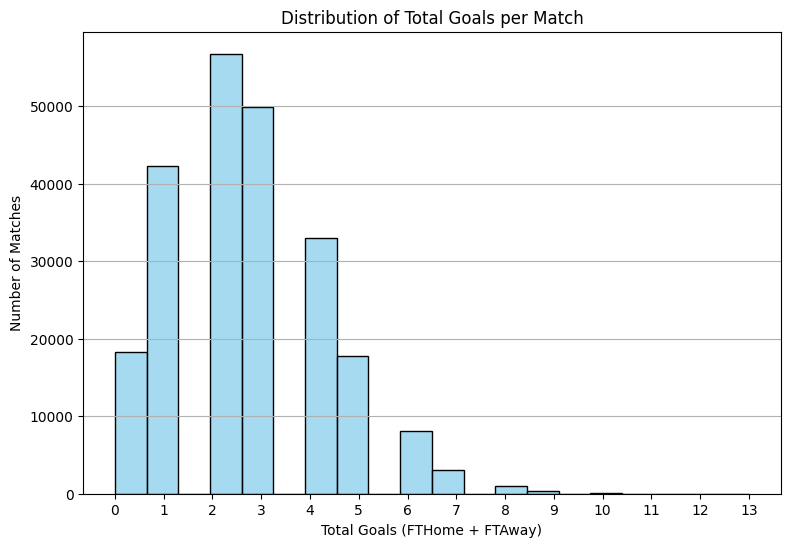

In [21]:
# How are goals distributed across all matches?

df['TotalGoals'] = df['FTHome'] + df['FTAway']


plt.figure(figsize=(9, 6))
sns.histplot(df['TotalGoals'], bins=20, kde=False, color='skyblue')
plt.title("Distribution of Total Goals per Match")
plt.xlabel("Total Goals (FTHome + FTAway)")
plt.ylabel("Number of Matches")
plt.xticks(range(0, int(df['TotalGoals'].max())+1))
plt.grid(axis='y')
plt.show()


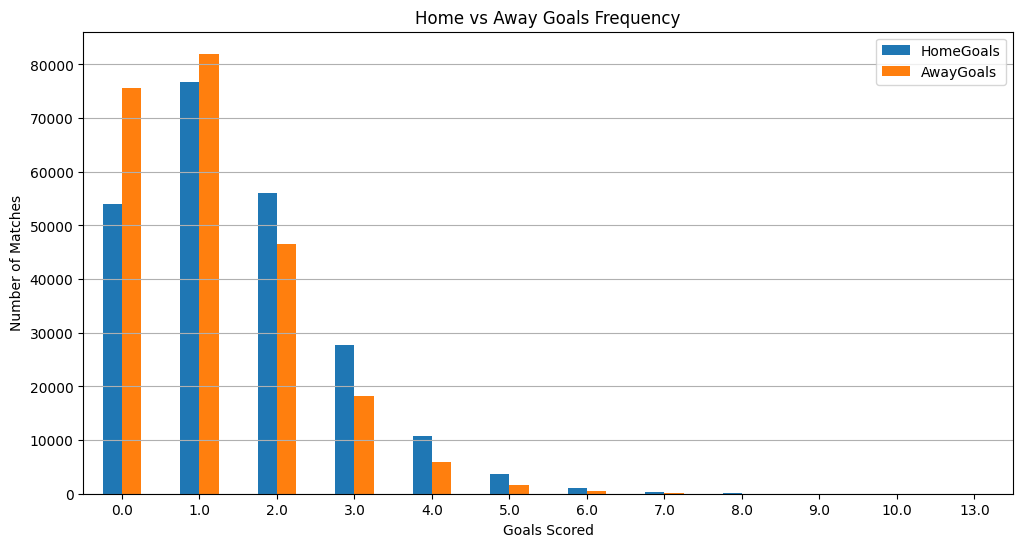

In [22]:
# Which team usually scores more? Is home / away advantage real ?

# Count how many times each goal count occurred
home_goals = df['FTHome'].value_counts().sort_index()
away_goals = df['FTAway'].value_counts().sort_index()

# Combine into one DataFrame
goals_df = pd.DataFrame({'HomeGoals': home_goals, 'AwayGoals': away_goals})

# Plot side-by-side bars
goals_df.plot(kind='bar', figsize=(12,6))
plt.title("Home vs Away Goals Frequency")
plt.xlabel("Goals Scored")
plt.ylabel("Number of Matches")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


4. ** Feature Engineering & Selection ** 

    Create target column: Over3Goals

    Think: What features (columns) might help predict this?

    Drop features that are leakage (e.g., final result), or come after the match

    Decide what to do with missing values

    Try new features (goal difference, elo diff, etc.)

In [ ]:
# Creating a new column for over 3 goals:
    
df['TotalGoals'] = df['FTHome'] + df['FTAway']

# Step 1: Define the function
def classify_over_3_goals(goals):
    if goals >= 3:
        return 1
    else:
        return 0

# Step 2: Apply the function to the column

df['Over3Goals'] = df['TotalGoals'].apply(classify_over_3_goals)



In [94]:
# Check the distribution

df['Over3Goals'].value_counts(normalize=True)


Over3Goals
0    0.50869
1    0.49131
Name: proportion, dtype: float64

Think which features might be important to help predict total goals (target column):
Feature	                                Why it’s useful

HomeElo	                                Captures overall strength of home team
AwayElo	                                Captures overall strength of away team
Form3Home	                            Goals scored recently by home team (last 3 games)
Form3Away	                            Goals scored recently by away team
OddHome	                                Betting odds for home win — lower odds = stronger team
OddAway	                                Odds for away win
HandiSize	                            Handicap size — bigger value = more expected mismatch
HandiHome	                            Handicap favoring the home team (can be positive or negative)

PS: Leakage Columns, are columns we must drop because we do not need them in our dataset for modelling purposes. They are every other that does not make the 'features' variable below.

In [82]:
features = ['HomeElo', 'AwayElo', 'Form3Home', 'Form3Away', 
            'OddHome', 'OddAway', 'HandiSize', 'HandiHome']
target = 'Over3Goals'

# To get returns of the 8 columns plus the target column to be used for modelling,
# create a new dataframe called df_model.

df_model = df[ features + [target]].copy()
df_model.shape

(230557, 9)

In [83]:
#Examine Missing Values from Latest DataFrame

df_model.isnull().sum()


HomeElo       88960
AwayElo       89029
Form3Home      1500
Form3Away      1500
OddHome        3030
OddAway        3030
HandiSize     73824
HandiHome     74082
Over3Goals        0
dtype: int64

In [84]:
# These show the strength of each team based on long-term performance.
# More than 88,000 rows were missing Elo ratings — mostly from very old matches.
# Since Elo is a critical feature, we dropped all rows where Elo was missing.
# This reduces our dataset size, but increased its quality and realism.

df_model = df_model.dropna(subset=['HomeElo', 'AwayElo'])



In [86]:
df_model.shape

(132413, 9)

In [87]:
# These represent the number of goals each team scored in their last 3 matches.
# About 1,500 rows were missing — that’s a small portion.
# We dropped rows with missing values here because:
# 1. They’re few
# 2. And guessing form isn’t ideal

# We kept the data clean while preserving useful features.

df_model = df_model.dropna(subset=['Form3Home', 'Form3Away'])
df_model.shape

(132005, 9)

In [88]:
# Check how many rows still there are for missing values of the Home and Away Odds
df_model[['OddHome', 'OddAway']].isnull().sum()


OddHome    2344
OddAway    2344
dtype: int64

In [89]:
#Drop the rows with missing betting odds:
df_model = df_model.dropna(subset=['OddHome', 'OddAway'])

#Check how many rows now remain in df_model
df_model.shape

(129661, 9)

In [90]:
# I have decided to drop handi_size and HandiHome from the model:

#df_model = df_model.drop(columns=['HandiSize', 'HandiHome'])
df_model = df_model.drop(columns=[col for col in ['HandiSize', 'HandiHome'] if col in df_model.columns])



In [91]:
df_model.shape

(129661, 7)

In [92]:
df_model.head()

,HomeElo,AwayElo,Form3Home,Form3Away,OddHome,OddAway,Over3Goals
0,1686.34,1586.57,0.0,0.0,1.65,4.30,1
1,1714.89,1642.51,0.0,0.0,1.60,4.60,1
3,1635.58,1624.22,0.0,0.0,1.70,3.90,0
4,1734.34,1673.11,0.0,0.0,1.65,4.30,0
5,1578.51,1620.74,0.0,0.0,2.25,2.75,1


**Create new columns:** 

How to decide what new columns to create:
Ask: what might affect goals?

| New Feature | Description             | Why It's Useful                     |
| ----------- | ----------------------- | ----------------------------------- |
| `EloDiff`   | HomeElo - AwayElo       | Measures team strength gap          |
| `FormDiff`  | Form3Home - Form3Away   | Who’s in better recent scoring form |
| `AvgElo`    | (HomeElo + AwayElo) / 2 | Overall match quality or level      |
| `TotalOdds` | OddHome + OddAway       | Implied uncertainty in outcome      |
| `OddsRatio` | OddHome / OddAway       | Balance of expected win likelihood  |

In [102]:
# Elo Difference
df_model['EloDiff'] = df_model['HomeElo'] - df_model['AwayElo']

# Form Difference
df_model['FormDiff'] = df_model['Form3Home'] - df_model['Form3Away']

#Average Form
df_model['AvgForm'] = (df_model['Form3Home'] + df_model['Form3Away']) / 2

# Total Odds
df_model['TotalOdds'] = df_model['OddHome'] + df_model['OddAway']

# Odds Ratio
df_model['OddsRatio'] = df_model['OddHome'] / df_model['OddAway']


Now to our Final features Selection based on the columns we had and the columns we have created.
The selection of features will be based on columns that are:

    1. Are available before the match starts (no leaks)
    2. Are informative (helpful for predicting goals)
    3. Are clean (no missing values, good distributions)

| Feature      | Why Keep It?       | Notes                         |
| ------------ | ------------------ | ----------------------------- |
| `HomeElo`    | Team strength      | Raw rating                    |
| `AwayElo`    | Team strength      | Raw rating                    |
| `Form3Home`  | Recent goals       | Very relevant                 |
| `Form3Away`  | Recent goals       | Very relevant                 |
| `EloDiff`    | Strength gap       | Engineered                    |
| `FormDiff`   | Attack gap         | Engineered                    |
| `AvgForm`    | Combined firepower | Kind of Optional                      |
| `OddHome`    | Betting signal     | Market data                   |
| `OddAway`    | Betting signal     | Market data                   |
| `TotalOdds`  | Market uncertainty | Engineered                    |
| `OddsRatio`  | Market confidence  | Engineered                    |

| `Over3Goals` | Target Variable  | This is what we’re predicting |


In [104]:
#Split the Data for Testing and Training
#Import the tool

from sklearn.model_selection import train_test_split

In [ ]:
#Define the X(Inputs) and y(Target) 

X = df_model[[
    'HomeElo', 'AwayElo',
    'Form3Home', 'Form3Away',
    'EloDiff', 'FormDiff', 'AvgForm',
    'OddHome', 'OddAway',
    'TotalOdds', 'OddsRatio'
]]
y = df_model['Over3Goals']

In [108]:
# Lets split the data in 80/20 (80 goes to the train set and 20 goes to the test set)
# Then to confirm, run a print statement over the train set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (103728, 11)
Test set size: (25933, 11)


As a start we will use Logistic regression because: 

The problem is a binary clasification (where 0 is under 3 and 1 is over 3)


In [ ]:
#First, import the Logistic Regression model from the sklearn library
#Then store the imported model inside a variable called model
# While at it iterate over it 1000 times


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [113]:
#Train the Model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [114]:
# Make predictions on the test set:

y_pred = model.predict(X_test)


In [117]:
# Check that the test model works accurately and whats the accuracy score:

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5449427370531755


** Model Evaluation ** 

    Evaluate on test set using:
        Accuracy
        Confusion matrix
        Precision / Recall
        ROC-AUC curve

Import evaluation tools needed to ealuate how well the model is performing.
They are: 

1. The module itself sklearn.metrics

2. classification_report which will tell us:   

Precision: How many predicted Over 3 Goals were actually correct?
   Recall: How many actual Over 3 Goals did we successfully find?
     F1 Score: A balance between precision and recall
         Support: How many examples were in each class

3. confusion_matrix which will tell us:

   how many predictions were correct or wrong, broken into 4 groups:
    True Positives → predicted Over, actually Over
    True Negatives → predicted Under, actually Under
    False Positives → predicted Over, actually Under
    False Negatives → predicted Under, actually Over

4. roc_auc_score

This tells you how well your model can separate the two classes:
    0.5 = model is guessing randomly
    1.0 = perfect separation
    Above 0.7 is usually decent
This score is based on probabilities, not just predictions.

5. roc_curve

This gives the data points needed to plot the ROC Curve:
    X = false positive rate
    Y = true positive rate

We use this for visualizing how good the model is at separating classes at different thresholds.

6. import seaborn as sns

We’ll use this for:

    Beautiful visualizations
    Heatmaps (for confusion matrix)

7. import matplotlib.pyplot as plt

This is the standard Python plotting library.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

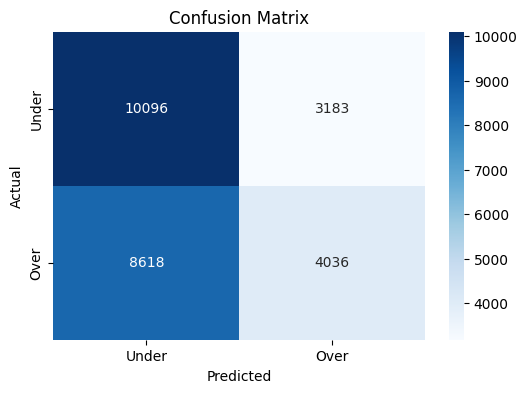

In [121]:
#Confusion Matrix, telling us how many matches were predicted correctly or wrongly:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Under', 'Over'], yticklabels=['Under', 'Over'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [123]:
y_test.value_counts()

Over3Goals
0    13279
1    12654
Name: count, dtype: int64

In [124]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

Precision = True Positive / (True Positive + False positive) 


Recall = True Positive / (True Positive + False Negative)

In [125]:
tp = 4036
fp = 3183
tn = 10096
fn = 8618

In [126]:
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)
print(f'Precision is {Precision} and Recall is {Recall}')


Precision is 0.5590802050145449 and Recall is 0.31895052947684527


In [128]:
ps = precision_score (y_test, y_pred)
rs = recall_score (y_test, y_pred)
print(f"The Presicion score will be {ps} and the Recall Score will be {rs}")

The Presicion score will be 0.5590802050145449 and the Recall Score will be 0.31895052947684527


In [130]:
# F1 score is the harmonic mean between precision and recall

f1 = ((ps * rs) / (ps + rs)) * 2
print((f"The F1 score is {f1}"))

The F1 score is 0.40617923816233076


In [133]:
print(f1_score(y_test, y_pred))

0.4061792381623308


In [140]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, beta=0.5)

0.4859137972549964

In [136]:
fbeta_score(y_test, y_pred, beta=2)

0.34892366214230136

5. Data Cleaning

    Handle missing values (drop, fill, or ignore based on importance)

    Normalize or scale features if needed (for some models)

    Encode categorical data (e.g., Division, HomeTeam) if using them

    Ensure data is ready for modeling

Model Training

    Split into train/test sets (e.g., 80% / 20%)

    Train different models:

        Logistic Regression

        Random Forest

        Gradient Boosting

    Use cross-validation if needed

8. Model Tuning

    Hyperparameter tuning (e.g., GridSearchCV)

    Try different feature combinations

    Avoid overfitting or underfitting

Final Model + Export

    Pick best model

    Save it with joblib/pickle

    Write up your findings (What works? What doesn't?)

10. Deployment / Interface

    Create a simple interface where someone can input:

        Home team, away team, odds, elo, etc.

        Then the model predicts: “Likely Over 3 Goals” or not